<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/HW11_zGermain/time_series_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# population trends by country through clustering analysis

In [0]:
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np

# Data ingestion

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
mkdir drive/My\ Drive/dsps

mkdir: cannot create directory ‘drive/My Drive/dsps’: File exists


In [7]:
cd drive/My\ Drive/dsps

/content/drive/My Drive/dsps


In [8]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

--2019-11-17 19:42:57--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel
Resolving api.worldbank.org (api.worldbank.org)... 34.237.118.112
Connecting to api.worldbank.org (api.worldbank.org)|34.237.118.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189440 (185K) [application/vnd.ms-excel]
Saving to: ‘SP.POP.TOTL?downloadformat=excel.1’

SP.POP.TOTL?downloa 100%[===================>] 185.00K  --.-KB/s    in 0.08s   

2019-11-17 19:42:57 (2.18 MB/s) - ‘SP.POP.TOTL?downloadformat=excel.1’ saved [189440/189440]



In [9]:
pd.read_excel("SP.POP.TOTL?downloadformat=excel", usecols=[0] + 
              list(range(4,100)), skiprows=[1,2]
      ).set_index("Data Source")

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1

In [10]:
datain = pd.read_excel("SP.POP.TOTL?downloadformat=excel", usecols=[0] + 
              list(range(4,100)), skiprows=[1,2]
      ).set_index("Data Source")
datain.columns = datain.iloc[0]
datain.drop("Country Name", inplace=True)
datain

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,20

# TASK I a

In [11]:
print("there are {} countries and {} time stamps in the data".
      format(datain.shape[0], datain.shape[1]))

there are 264 countries and 60 time stamps in the data


Cleaning the data from NaNs

In [12]:
datain = datain.dropna(axis=1, how='all')
(datain.isna().sum()>0).sum()

59

In [0]:
datain = datain.dropna(axis=0)

In [14]:
(datain.isna().sum()>0).sum()

0

# TASK Ib

# print the number of countries and the length of the timeline

In [15]:
print("there are {} countries and {} time stamps in the data".
      format(datain.shape[0], datain.shape[1])) #*datain.shape

there are 258 countries and 59 time stamps in the data


# TASK II

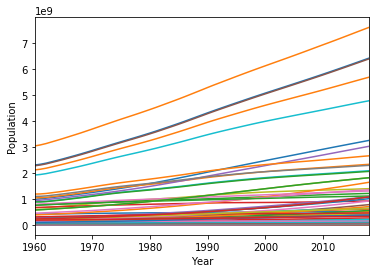

In [93]:
ax = datain.T.plot(legend=False);
ax.set_xlabel("Year")
ax.set_ylabel("Population");

The time series plot of all the countries. It is not normalized so it is difficutl to see patterns of growth and the plots for countries that start below 1 billion. These 'countries' are actually groups of people, grouped by geographical region (like Sub-Saharan Africa or World), income, or both. Normalizing the population by country would allow us to visualize population behaviors better.

# TASK III

# Preprocessing
These are time series so *they cannot be whitened*
They should be scaled along the observation axis instead

In [17]:
X = preprocessing.scale(datain, axis = 1)
X.mean(axis=1).shape, X.mean(axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


((258,),
 array([ 8.05382126e-16,  4.21508403e-16,  4.81723889e-16, -6.76483351e-16,
        -3.38712109e-16, -6.51079943e-16, -1.20430972e-16,  5.34412439e-16,
         6.61664697e-16, -3.38712109e-16,  6.39789540e-16,  5.45702843e-16,
        -6.17208732e-16, -6.13445264e-16,  7.07531961e-16,  5.26885503e-17,
        -6.62370347e-16,  7.37639704e-16, -5.90864457e-16,  6.02154861e-17,
        -7.07531961e-16, -6.24735668e-16, -2.25808073e-17, -7.99736925e-18,
         4.51616146e-17, -6.20972200e-16, -7.67747448e-16, -6.43553007e-16,
        -1.01613633e-15,  7.86564787e-16,  6.02154861e-16, -2.40861944e-16,
        -7.15058897e-16, -1.03871713e-15, -9.78501649e-17, -6.02154861e-17,
         8.46780273e-16,  4.17744935e-16,  7.45166640e-16,  3.53765981e-16,
        -2.10754201e-16,  4.59143081e-16, -7.52693576e-16, -2.78496623e-16,
         1.80646458e-16, -4.13981467e-16,  2.14517669e-16, -7.60220512e-16,
        -8.61834145e-16,  3.01077430e-17,  9.18286163e-16,  6.05918329e-16,
   

In [18]:
X.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

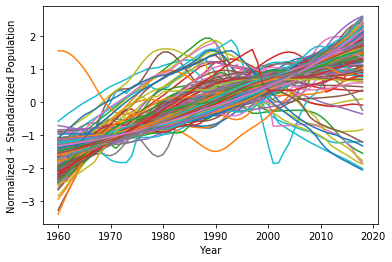

In [92]:
pl.figure()
pl.plot(X.T);
pl.xlabel("Year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])
pl.ylabel("Normalized + Standardized Population");

This contains the normalized populations as a time series for all countries. As they are normalized, it is easier to see patterns for one country over time and the population behavior for all countries. 

# TASK IV

# clustering

# cluster the data in 2 to 10 clusters and print the total variance for each cluster. 
# Plot the total variance as a function of number of clusters

In [0]:
from sklearn import cluster

i.c. variance 2498.198837646756
i.c. variance 1152.93801972529
i.c. variance 796.3224336279306
i.c. variance 596.1854652807191
i.c. variance 517.5033829457968
i.c. variance 443.80557785179485
i.c. variance 396.61053452589414
i.c. variance 356.2421026323407
i.c. variance 323.30750164091717


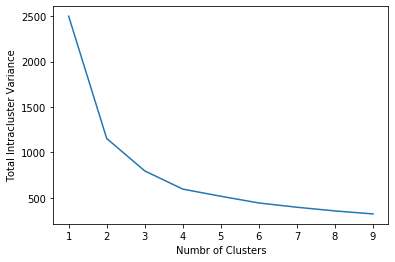

In [91]:
nmaxc = 10
nc = []
for i in range(1, nmaxc):
  c = cluster.k_means(X, i)
  nc.append(c[2])
  print("i.c. variance", c[2])
pl.plot(range(1, nmaxc), nc)
pl.xlabel("Numbr of Clusters")
pl.ylabel("Total Intracluster Variance");

This the 'elbow' curve for determining the optimal number of clusters. This curve suggest that 4 clusters is optimal.

# what is the appropriate number of clusters?

4 clusters

# TASK V

pick some number of clusters and
- cluster the time series with k-means and the chosen number of cluster
- print the number of time series in each cluster
- for each cluster plot the cluster center and each time series that belong to that center in the same plot
- print the names of the countries in the smallest cluster

In [0]:
clustPop = cluster.k_means(X, 4)

In [23]:
# making sure I am clustering along the right axis: 
# each cluster center shoul de as long as the timeline: 59
X.shape, c[0].shape

((258, 59), (9, 59))

In [24]:
clustPop[1]

array([3, 3, 3, 2, 0, 3, 3, 0, 2, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 1, 3, 0,
       1, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 3, 3, 3, 0,
       3, 3, 0, 0, 2, 2, 3, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 1, 3, 0, 3, 0, 0, 0, 2, 0, 3, 3, 1, 3, 0, 3, 3, 3, 3, 0, 3,
       2, 3, 0, 2, 0, 0, 3, 3, 1, 0, 1, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 2, 2, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 0, 0, 0, 2, 3, 3, 3, 0, 0, 0, 2, 3,
       3, 0, 0, 2, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 3, 2, 0, 0, 0, 0, 0, 0, 3, 1, 2, 3,
       0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 0, 0,
       3, 3, 0, 2, 3, 0, 0, 0, 0, 3, 0, 2, 0, 3, 0, 0, 0, 0, 3, 3, 1, 0,
       0, 0, 0, 2, 0, 3, 2, 0, 3, 0, 0, 2, 3, 0, 3, 0], dtype=int32)

In [26]:
print("Number of clusters: {}".format(len(set(clustPop[1]))))

Number of clusters: 4


In [65]:
for i in range(0, 4):
  print("Number of countries in cluster {}: {}".format(i + 1, len(clustPop[1][clustPop[1] == i])))

Number of countries in cluster 1: 123
Number of countries in cluster 2: 10
Number of countries in cluster 3: 26
Number of countries in cluster 4: 99


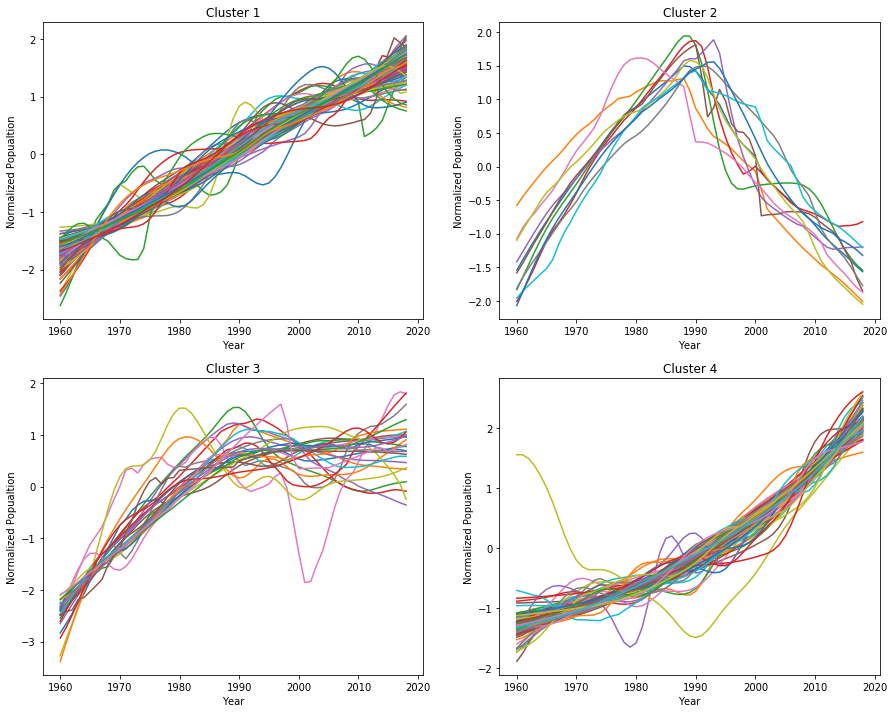

In [66]:
fig = pl.figure(figsize = (15, 12))
for i in range(0,4):
  pl.subplot(2, 2, i+1)
  pl.plot(clustPop[0][i])
  pl.plot(X[clustPop[1] == i].T);
  pl.xlabel("Year")
  pl.xticks(ticks=range(0, 70, 10), 
            labels=["%d"%yr for yr in range(1960, 2030, 10)])
  pl.ylabel("Normalized Popualtion")
  pl.title("Cluster {}".format(i + 1))

<span style="color:red">**-2 pts: should black the center lines**</span>

This figure contains four plots, each a plot of the time series of all the countries in a cluster. One can see some outliers in each cluster, but generally the countries of a cluster all show very similar behaviors in population change.

In [99]:
print("Countries of the Smallest Cluster, 2:")
for i in range(0,10):
  print("{}".format(datain.index.values[clustPop[1] == 1][i]))

Countries of the Smallest Cluster, 2:
Bulgaria
Bosnia and Herzegovina
Estonia
Georgia
Croatia
Hungary
Lithuania
Latvia
Romania
Ukraine
